<a href="https://colab.research.google.com/github/KzBrain/project/blob/main/HW_2_Parkinson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import pandas as pd
from sklearn.linear_model import ElasticNetCV, RidgeCV, LassoCV, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

#Parkinson disease
Болезнь Паркинсона медленно прогрессирующее хроническое нейродегенеративное неврологическое заболевание, характерное для лиц старшей возрастной группы, затрагивающий эктрапирамидную или дофаминергическую систему в особенности черную субстанцию головного мозга. Отличительная симптоматика: тремор в покое,гипокинезия,нарушение походки,гипертонус в мышцах и неустойчивость осанки.Диагностика БП ставится на основе клинической картины,но проблема в том что у болезни клиника развивается годами и нет других отличительных диагностических маркеров,чтоб выявить его в раннем периоде.
В этом датасете,как я понял, представлен один из методов ранней диагностики болезни на основе анализа голосовых изменении.

Тут пример основных предикторов:

name: Имя пациента

MDVP
(Hz): Средняя частота основного тона голоса

MDVP
(Hz): Максимальная частота основного тона голоса

MDVP
(Hz): Минимальная частота основного тона голоса

MDVP
(%), MDVP
(Abs), MDVP
, MDVP
, Jitter
: Различные меры джиттера (изменчивости частоты)

MDVP
, MDVP
(dB), Shimmer
, Shimmer
, MDVP
, Shimmer
: Различные меры шиммера (изменчивости амплитуды)

NHR, HNR: Соотношение шума к гармоникам и гармоникам к шуму
RPDE, DFA: Нелинейные меры

spread1, spread2, D2: Различные меры, описывающие рассеяние спектра
PPE: Мера энтропии основного тона


In [3]:
!pip install ucimlrepo

In [4]:
from ucimlrepo import fetch_ucirepo

In [5]:
# fetch dataset
parkinsons = fetch_ucirepo(id=174)

In [9]:
X = parkinsons.data.features
y = parkinsons.data.targets

print(parkinsons.metadata)

{'uci_id': 174, 'name': 'Parkinsons', 'repository_url': 'https://archive.ics.uci.edu/dataset/174/parkinsons', 'data_url': 'https://archive.ics.uci.edu/static/public/174/data.csv', 'abstract': "Oxford Parkinson's Disease Detection Dataset", 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 197, 'num_features': 22, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['status'], 'index_col': ['name'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2007, 'last_updated': 'Wed Feb 14 2024', 'dataset_doi': '10.24432/C59C74', 'creators': ['Max Little'], 'intro_paper': {'title': 'Exploiting Nonlinear Recurrence and Fractal Scaling Properties for Voice Disorder Detection', 'authors': 'Max A. Little, P. McSharry, S. Roberts, D. Costello, I. Moroz', 'published_in': 'BioMedical Engineering OnLine', 'year': 2007, 'url': 'https://www.semanticscholar.org/paper/27e1dcd0d64bfc9d936e597d4f29b8

In [7]:
# variable information
print(parkinsons.variables)

            name     role         type demographic description units  \
0           name       ID  Categorical        None        None  None   
1        MDVP:Fo  Feature   Continuous        None        None    Hz   
2       MDVP:Fhi  Feature   Continuous        None        None    Hz   
3       MDVP:Flo  Feature   Continuous        None        None    Hz   
4    MDVP:Jitter  Feature   Continuous        None        None     %   
5    MDVP:Jitter  Feature   Continuous        None        None   Abs   
6       MDVP:RAP  Feature   Continuous        None        None  None   
7       MDVP:PPQ  Feature   Continuous        None        None  None   
8     Jitter:DDP  Feature   Continuous        None        None  None   
9   MDVP:Shimmer  Feature   Continuous        None        None  None   
10  MDVP:Shimmer  Feature   Continuous        None        None    dB   
11  Shimmer:APQ3  Feature   Continuous        None        None  None   
12  Shimmer:APQ5  Feature   Continuous        None        None  

In [11]:
print(y)

     status
0         1
1         1
2         1
3         1
4         1
..      ...
190       0
191       0
192       0
193       0
194       0

[195 rows x 1 columns]


In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MDVP:Fo       195 non-null    float64
 1   MDVP:Fhi      195 non-null    float64
 2   MDVP:Flo      195 non-null    float64
 3   MDVP:Jitter   195 non-null    float64
 4   MDVP:Jitter   195 non-null    float64
 5   MDVP:RAP      195 non-null    float64
 6   MDVP:PPQ      195 non-null    float64
 7   Jitter:DDP    195 non-null    float64
 8   MDVP:Shimmer  195 non-null    float64
 9   MDVP:Shimmer  195 non-null    float64
 10  Shimmer:APQ3  195 non-null    float64
 11  Shimmer:APQ5  195 non-null    float64
 12  MDVP:APQ      195 non-null    float64
 13  Shimmer:DDA   195 non-null    float64
 14  NHR           195 non-null    float64
 15  HNR           195 non-null    float64
 16  RPDE          195 non-null    float64
 17  DFA           195 non-null    float64
 18  spread1       195 non-null    

<Axes: >

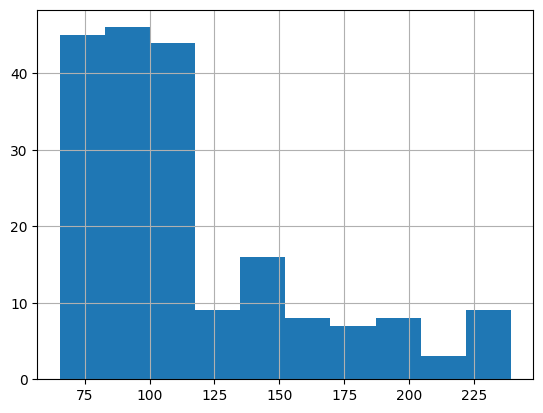

In [27]:
X['MDVP:Flo'].hist()

<Axes: >

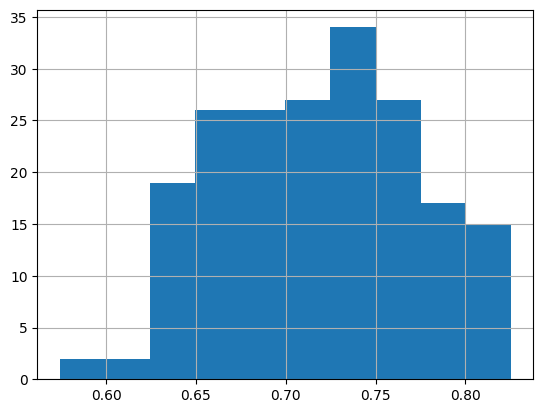

In [29]:
X['DFA'].hist()

<Axes: >

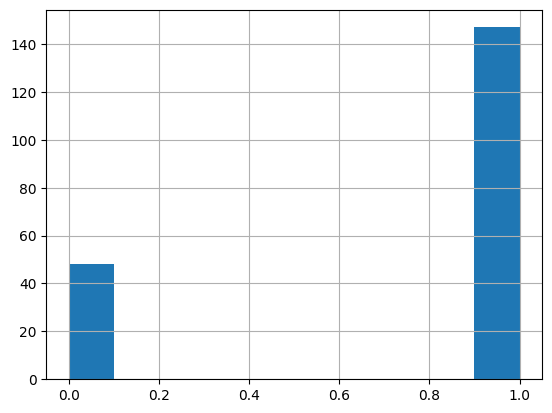

In [30]:
y['status'].hist()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Стандартизация данных
StandardScaler используем для стандартизации потомучто непрерывные переменные признаков не совпадают НПР или Гауссовскому методу распределния.

In [25]:
scaler = StandardScaler()

In [31]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [69]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

<ipython-input-69-d1560da9d400>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [70]:
preds = model.predict(X_test_scaled)

In [71]:
f1_score(y_test, preds)

0.9555555555555557

In [72]:
accuracy_score(y_test, preds)

0.9322033898305084

In [41]:
model2 = LogisticRegression()
model2.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [42]:
preds2 = model2.predict(X_test_scaled)

In [43]:
f1_score(y_test, preds2)

0.9130434782608695

In [44]:
accuracy_score(y_test, preds2)

0.864406779661017

In [53]:
model3 = DecisionTreeClassifier(
    max_depth=4,
    random_state=42,
    min_samples_split=5,
    min_samples_leaf=5,
)
model3.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, min_samples_split=5,
                       random_state=42)

In [54]:
preds3 = model3.predict(X_test_scaled)

In [55]:
f1_score(y_test, preds3)

0.8705882352941177

In [56]:
accuracy_score(y_test, preds3)

0.8135593220338984

Из использованных моделей на и более хороший результат показал RandomForestClassifier для задачи классификации с F1 score 95.5%.

<Axes: >

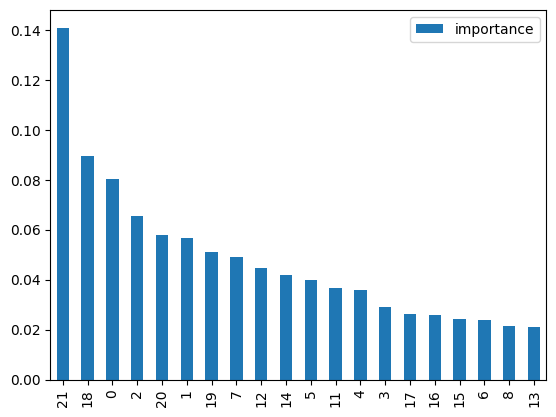

In [82]:
importances = model.feature_importances_
vals = X.columns
forest_vals = pd.DataFrame({'value':vals, 'importance':importances}).sort_values(by='importance', ascending=False)
forest_vals[:20].plot(kind='bar')

<Axes: >

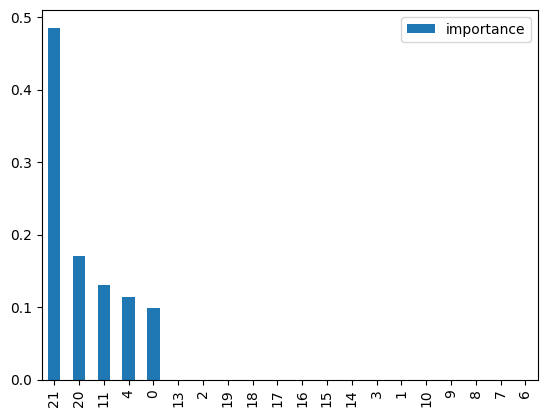

In [83]:
importances = model3.feature_importances_
vals = X.columns
forest_vals = pd.DataFrame({'value':vals, 'importance':importances}).sort_values(by='importance', ascending=False)
forest_vals[:20].plot(kind='bar')

В третьем моделе DecisionTreeClassifier не все признаки были важны и может быть многие были не использованы.

<Axes: xlabel='Feature'>

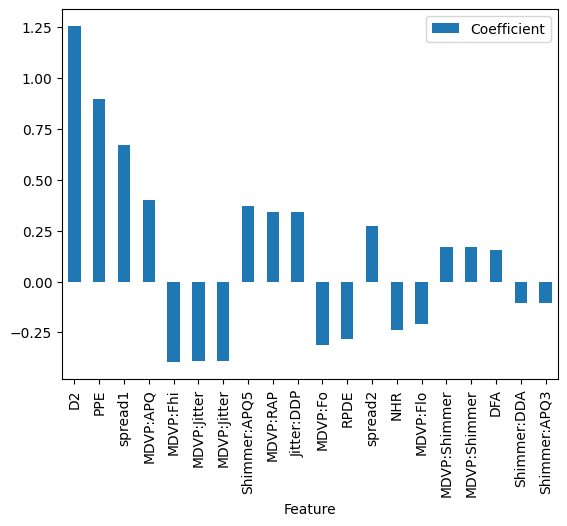

In [85]:
coefficients = model2.coef_[0]
feature_names = X.columns
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', key=abs, ascending=False)
coef_df[:20].plot(x='Feature', y='Coefficient', kind='bar')

Функции с более крупными столбиками (как положительными, так и отрицательными) более важны для прогноза модели.
Направление влияния: Знак коэффициента (положительный или отрицательный) указывает, увеличивает ли более высокое значение этого признака (положительное) или уменьшает (отрицательное) вероятность прогнозируемого результата.
Например, «D2» кажется наиболее важным признаком, имеющим большой положительный коэффициент. Это означает, что более высокое значение «D2», вероятно, увеличивает вероятность результата, предсказанного моделью.